In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

##data downloaded from github 

# Part 1-Predicting Rainfall Yes/No

In [87]:

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")

checking the column names

In [88]:
df.columns


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [89]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

checking the null values using heatmap, so to check this in values we will use below command

In [90]:
df.shape
#data has 23 columns and 8425 rows

(8425, 23)

<AxesSubplot:>

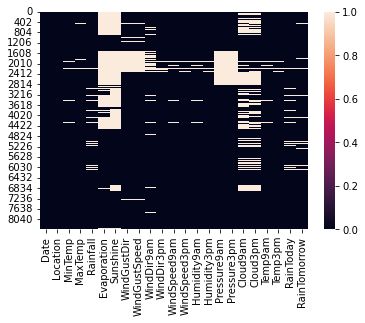

In [91]:
sns.heatmap(df.isnull())

# checking the count of null values

In [92]:
df.isnull().sum()


Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

# we will require encoding to convert oject into float which we will do later

In [93]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

The gap between std dev and mean clearly indicated data has outliers , which we will check and remove later

In [94]:
df.describe()


MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        50.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7116.000000  7113.000000  6004.000000  5970.000000  8369.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.828699     6.766681     2.877658     2.731659     5.627035   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.000000  1010.400000     1.000000     2.000000    13.800000   
50%    1017.700000  1015.300000     5.000000     5.000000    17.800000   
75%    1022.300000  1019.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8329.000000  
mean     22.442934  
std       5.980020  
min       7.300000  
25%      18.000000  
50%      21.900000  
75%      26.400000  
max      44.100000

Here we will replace NULL values with Mean or Mode
some of the column have char values i.e. WindGustDir,RainToday,RainTomorrow,WindDir9am,WindDir3pm will go with replacing with NULL with Mode due to the charactristic of these columns and for rest we will use Mean

In [95]:
#using simple imputer strategy to replacce NAN values with mode 
import numpy as np
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['RainTomorrow']=imp.fit_transform(df['RainTomorrow'].values.reshape(-1,1))
df['WindGustDir']=imp.fit_transform(df['WindGustDir'].values.reshape(-1,1))
df['WindDir9am']=imp.fit_transform(df['WindDir9am'].values.reshape(-1,1))
df['WindDir3pm']=imp.fit_transform(df['WindDir3pm'].values.reshape(-1,1))
df['RainToday']=imp.fit_transform(df['RainToday'].values.reshape(-1,1))


In [96]:
#using simple imputer strategy to replacce NAN values with mean for rest of the columns
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
df['MinTemp']=imp.fit_transform(df['MinTemp'].values.reshape(-1,1))
df['MaxTemp']=imp.fit_transform(df['MaxTemp'].values.reshape(-1,1))
df['Rainfall']=imp.fit_transform(df['Rainfall'].values.reshape(-1,1))
df['Sunshine']=imp.fit_transform(df['Sunshine'].values.reshape(-1,1))
df['Evaporation']=imp.fit_transform(df['Evaporation'].values.reshape(-1,1))
df['WindGustSpeed']=imp.fit_transform(df['WindGustSpeed'].values.reshape(-1,1))
df['WindSpeed9am']=imp.fit_transform(df['WindSpeed9am'].values.reshape(-1,1))
df['WindSpeed3pm']=imp.fit_transform(df['WindSpeed3pm'].values.reshape(-1,1))
df['Humidity9am']=imp.fit_transform(df['Humidity9am'].values.reshape(-1,1))
df['Humidity3pm']=imp.fit_transform(df['Humidity3pm'].values.reshape(-1,1))
df['Pressure9am']=imp.fit_transform(df['Pressure9am'].values.reshape(-1,1))
df['Pressure3pm']=imp.fit_transform(df['Pressure3pm'].values.reshape(-1,1))
df['Cloud9am']=imp.fit_transform(df['Cloud9am'].values.reshape(-1,1))
df['Cloud3pm']=imp.fit_transform(df['Cloud3pm'].values.reshape(-1,1))
df['Temp9am']=imp.fit_transform(df['Temp9am'].values.reshape(-1,1))
df['Temp3pm']=imp.fit_transform(df['Temp3pm'].values.reshape(-1,1))

Now checking the null value status

In [97]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<AxesSubplot:>

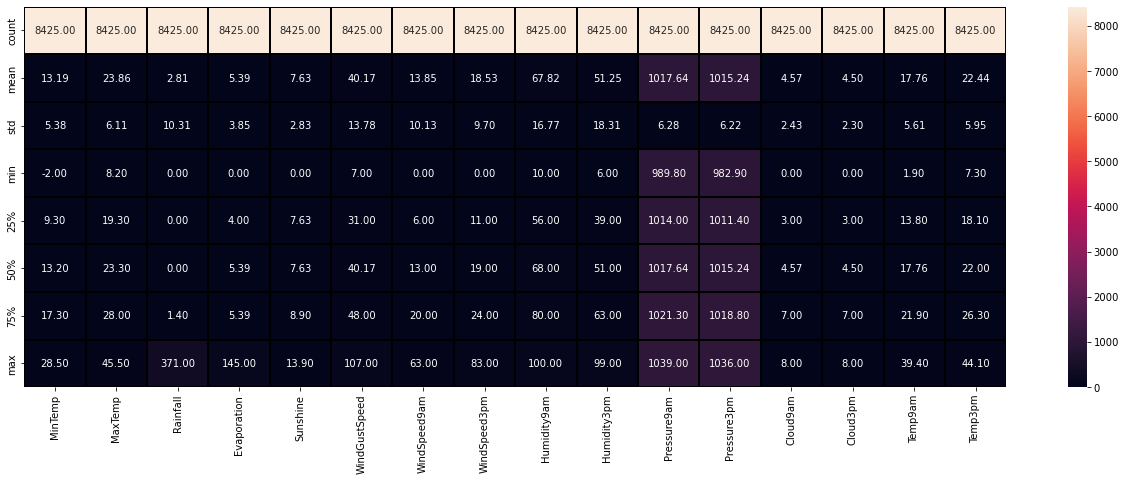

In [98]:
#Describing data in heatmap
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [99]:
df.shape
#data has 23 columns and 8425 rows

(8425, 23)

Above we can see data has outliers which we will remove later however we will first convert object datatypes to string using ordinal encoder


In [100]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [101]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [28]:
df.dtypes

Date             float64
Location         float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object

Above we have replaced null values and then converted all float to string, now we will check correlation and individual column data distribution

In [102]:
#now we will check correlation using tables and charts
dfcorr=df.corr()
dfcorr


Date  Location   MinTemp   MaxTemp  Rainfall  Evaporation  \
Date           1.000000  0.475037  0.016931  0.102409  0.004945     0.153853   
Location       0.475037  1.000000  0.116531  0.064268  0.007693     0.143519   
MinTemp        0.016931  0.116531  1.000000  0.717522  0.087684     0.254965   
MaxTemp        0.102409  0.064268  0.717522  1.000000 -0.087451     0.322405   
Rainfall       0.004945  0.007693  0.087684 -0.087451  1.000000     0.023517   
Evaporation    0.153853  0.143519  0.254965  0.322405  0.023517     1.000000   
Sunshine       0.065101  0.057817  0.056184  0.378403 -0.169432     0.226001   
WindGustDir   -0.084552 -0.035408 -0.145316 -0.224670  0.038812    -0.078765   
WindGustSpeed -0.037361  0.231396  0.230058  0.139998  0.086000     0.136371   
WindDir9am    -0.012369 -0.027103 -0.041650 -0.214119  0.093821    -0.061677   
WindDir3pm    -0.002895 -0.027736 -0.147166 -0.180622  0.038560    -0.047952   
WindSpeed9am  -0.083943  0.221378  0.136872  0.013314  0.050631     0.104294   
WindSpeed3pm  -0.046362  0.231801  0.178349  0.088172  0.024791     0.101126   
Humidity9am    0.086328  0.005662 -0.130731 -0.390976  0.228800    -0.213108   
Humidity3pm   -0.038345  0.055790  0.079048 -0.421879  0.235444    -0.161661   
Pressure9am    0.030809 -0.032261 -0.429432 -0.325721 -0.072668    -0.177786   
Pressure3pm    0.013545 -0.020574 -0.422991 -0.403258 -0.033649    -0.189558   
Cloud9am       0.005237  0.038019  0.091604 -0.253968  0.185444    -0.062283   
Cloud3pm      -0.010572  0.017561  0.038414 -0.250132  0.150760    -0.108022   
Temp9am        0.070703  0.118051  0.887119  0.866039 -0.007083     0.305264   
Temp3pm        0.113734  0.060570  0.685520  0.974506 -0.090687     0.315109   
RainToday     -0.011365  0.003071  0.064789 -0.224883  0.461106    -0.088654   
RainTomorrow  -0.011228  0.002824  0.092942 -0.152886  0.220021    -0.059012   

               Sunshine  WindGustDir  WindGustSpeed  WindDir9am  ...  \
Date           0.065101    -0.084552      -0.037361   -0.012369  ...   
Location       0.057817    -0.035408       0.231396   -0.027103  ...   
MinTemp        0.056184    -0.145316       0.230058   -0.041650  ...   
MaxTemp        0.378403    -0.224670       0.139998   -0.214119  ...   
Rainfall      -0.169432     0.038812       0.086000    0.093821  ...   
Evaporation    0.226001    -0.078765       0.136371   -0.061677  ...   
Sunshine       1.000000    -0.105918      -0.013778   -0.076560  ...   
WindGustDir   -0.105918     1.000000       0.016591    0.403562  ...   
WindGustSpeed -0.013778     0.016591       1.000000   -0.072058  ...   
WindDir9am    -0.076560     0.403562      -0.072058    1.000000  ...   
WindDir3pm    -0.068553     0.505799       0.071235    0.249527  ...   
WindSpeed9am  -0.018069     0.025399       0.600198    0.054272  ...   
WindSpeed3pm   0.030145     0.094623       0.634939    0.047116  ...   
Humidity9am   -0.360831     0.036467      -0.269593    0.025604  ...   
Humidity3pm   -0.440268     0.053567      -0.091860    0.124556  ...   
Pressure9am    0.021887    -0.109704      -0.407139   -0.011024  ...   
Pressure3pm   -0.035863    -0.024997      -0.372651    0.073446  ...   
Cloud9am      -0.533391     0.123883       0.023313    0.099582  ...   
Cloud3pm      -0.547304     0.092979       0.078631    0.062947  ...   
Temp9am        0.250640    -0.176318       0.202298   -0.103111  ...   
Temp3pm        0.395324    -0.238856       0.102199   -0.221634  ...   
RainToday     -0.234230     0.125188       0.076822    0.157324  ...   
RainTomorrow  -0.327731     0.051832       0.190127    0.032860  ...   

               Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
Date              0.086328    -0.038345     0.030809     0.013545  0.005237   
Location          0.005662     0.055790    -0.032261    -0.020574  0.038019   
MinTemp          -0.130731     0.079048    -0.429432    -0.422991  0.091604   
MaxTemp          -0.390976    -0.421879    -0.325721 

<AxesSubplot:>

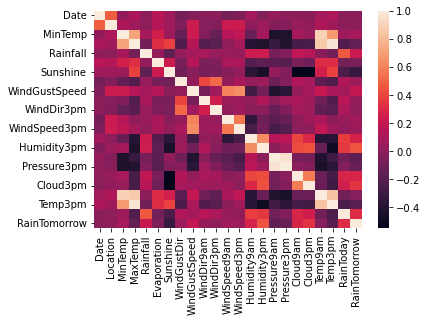

In [103]:
sns.heatmap(dfcorr)
#above observations can be seen in graph below

In [104]:
dfcorr["RainTomorrow"].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.444808
Cloud3pm         0.344369
RainToday        0.312929
Cloud9am         0.278943
Humidity9am      0.271222
Rainfall         0.220021
WindGustSpeed    0.190127
MinTemp          0.092942
WindSpeed9am     0.068285
WindSpeed3pm     0.053568
WindGustDir      0.051832
WindDir9am       0.032860
WindDir3pm       0.008918
Location         0.002824
Date            -0.011228
Temp9am         -0.023211
Evaporation     -0.059012
Pressure3pm     -0.135242
MaxTemp         -0.152886
Pressure9am     -0.163985
Temp3pm         -0.193805
Sunshine        -0.327731
Name: RainTomorrow, dtype: float64

From the above checks using correlation , we do not need MinTemp,WindSpeed9am,WindSpeed3pm,WindGustDir,WindDir9am,WindDir3pm,Location,Date,Temp9am,Evaporation as they are very low correlated with our output , so we will drop all of them to make the data claeaner


In [105]:
df1=df.drop(['MinTemp','WindSpeed9am','WindSpeed3pm','WindGustDir','WindDir9am','WindDir3pm','Location','Date','Temp9am','Evaporation'],axis=1)
df1

MaxTemp  Rainfall  Sunshine  WindGustSpeed  Humidity9am  Humidity3pm  \
0     22.900000       0.6  7.632205      44.000000         71.0         22.0   
1     25.100000       0.0  7.632205      44.000000         44.0         25.0   
2     25.700000       0.0  7.632205      46.000000         38.0         30.0   
3     28.000000       0.0  7.632205      24.000000         45.0         16.0   
4     32.300000       1.0  7.632205      41.000000         82.0         33.0   
...         ...       ...       ...            ...          ...          ...   
8420  23.400000       0.0  7.632205      31.000000         51.0         24.0   
8421  25.300000       0.0  7.632205      22.000000         56.0         21.0   
8422  26.900000       0.0  7.632205      37.000000         53.0         24.0   
8423  27.000000       0.0  7.632205      28.000000         51.0         24.0   
8424  23.859976       0.0  7.632205      40.174469         62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp3pm  RainToday  \
0          1007.7       1007.1  8.000000  4.503183     21.8        0.0   
1          1010.6       1007.8  4.566622  4.503183     24.3        0.0   
2          1007.6       1008.7  4.566622  2.000000     23.2        0.0   
3          1017.6       1012.8  4.566622  4.503183     26.5        0.0   
4          1010.8       1006.0  7.000000  8.000000     29.7        0.0   
...           ...          ...       ...       ...      ...        ...   
8420       1024.6       1020.3  4.566622  4.503183     22.4        0.0   
8421       1023.5       1019.1  4.566622  4.503183     24.5        0.0   
8422       1021.0       1016.8  4.566622  4.503183     26.1        0.0   
8423       1019.4       1016.5  3.000000  2.000000     26.0        0.0   
8424       1020.2       1017.9  8.000000  8.000000     20.9        0.0   

      RainTomorrow  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
...            ...  
8420           0.0  
8421           0.0  
8422           0.0  
8423           0.0  
8424           0.0  

[8425 rows x 13 columns]

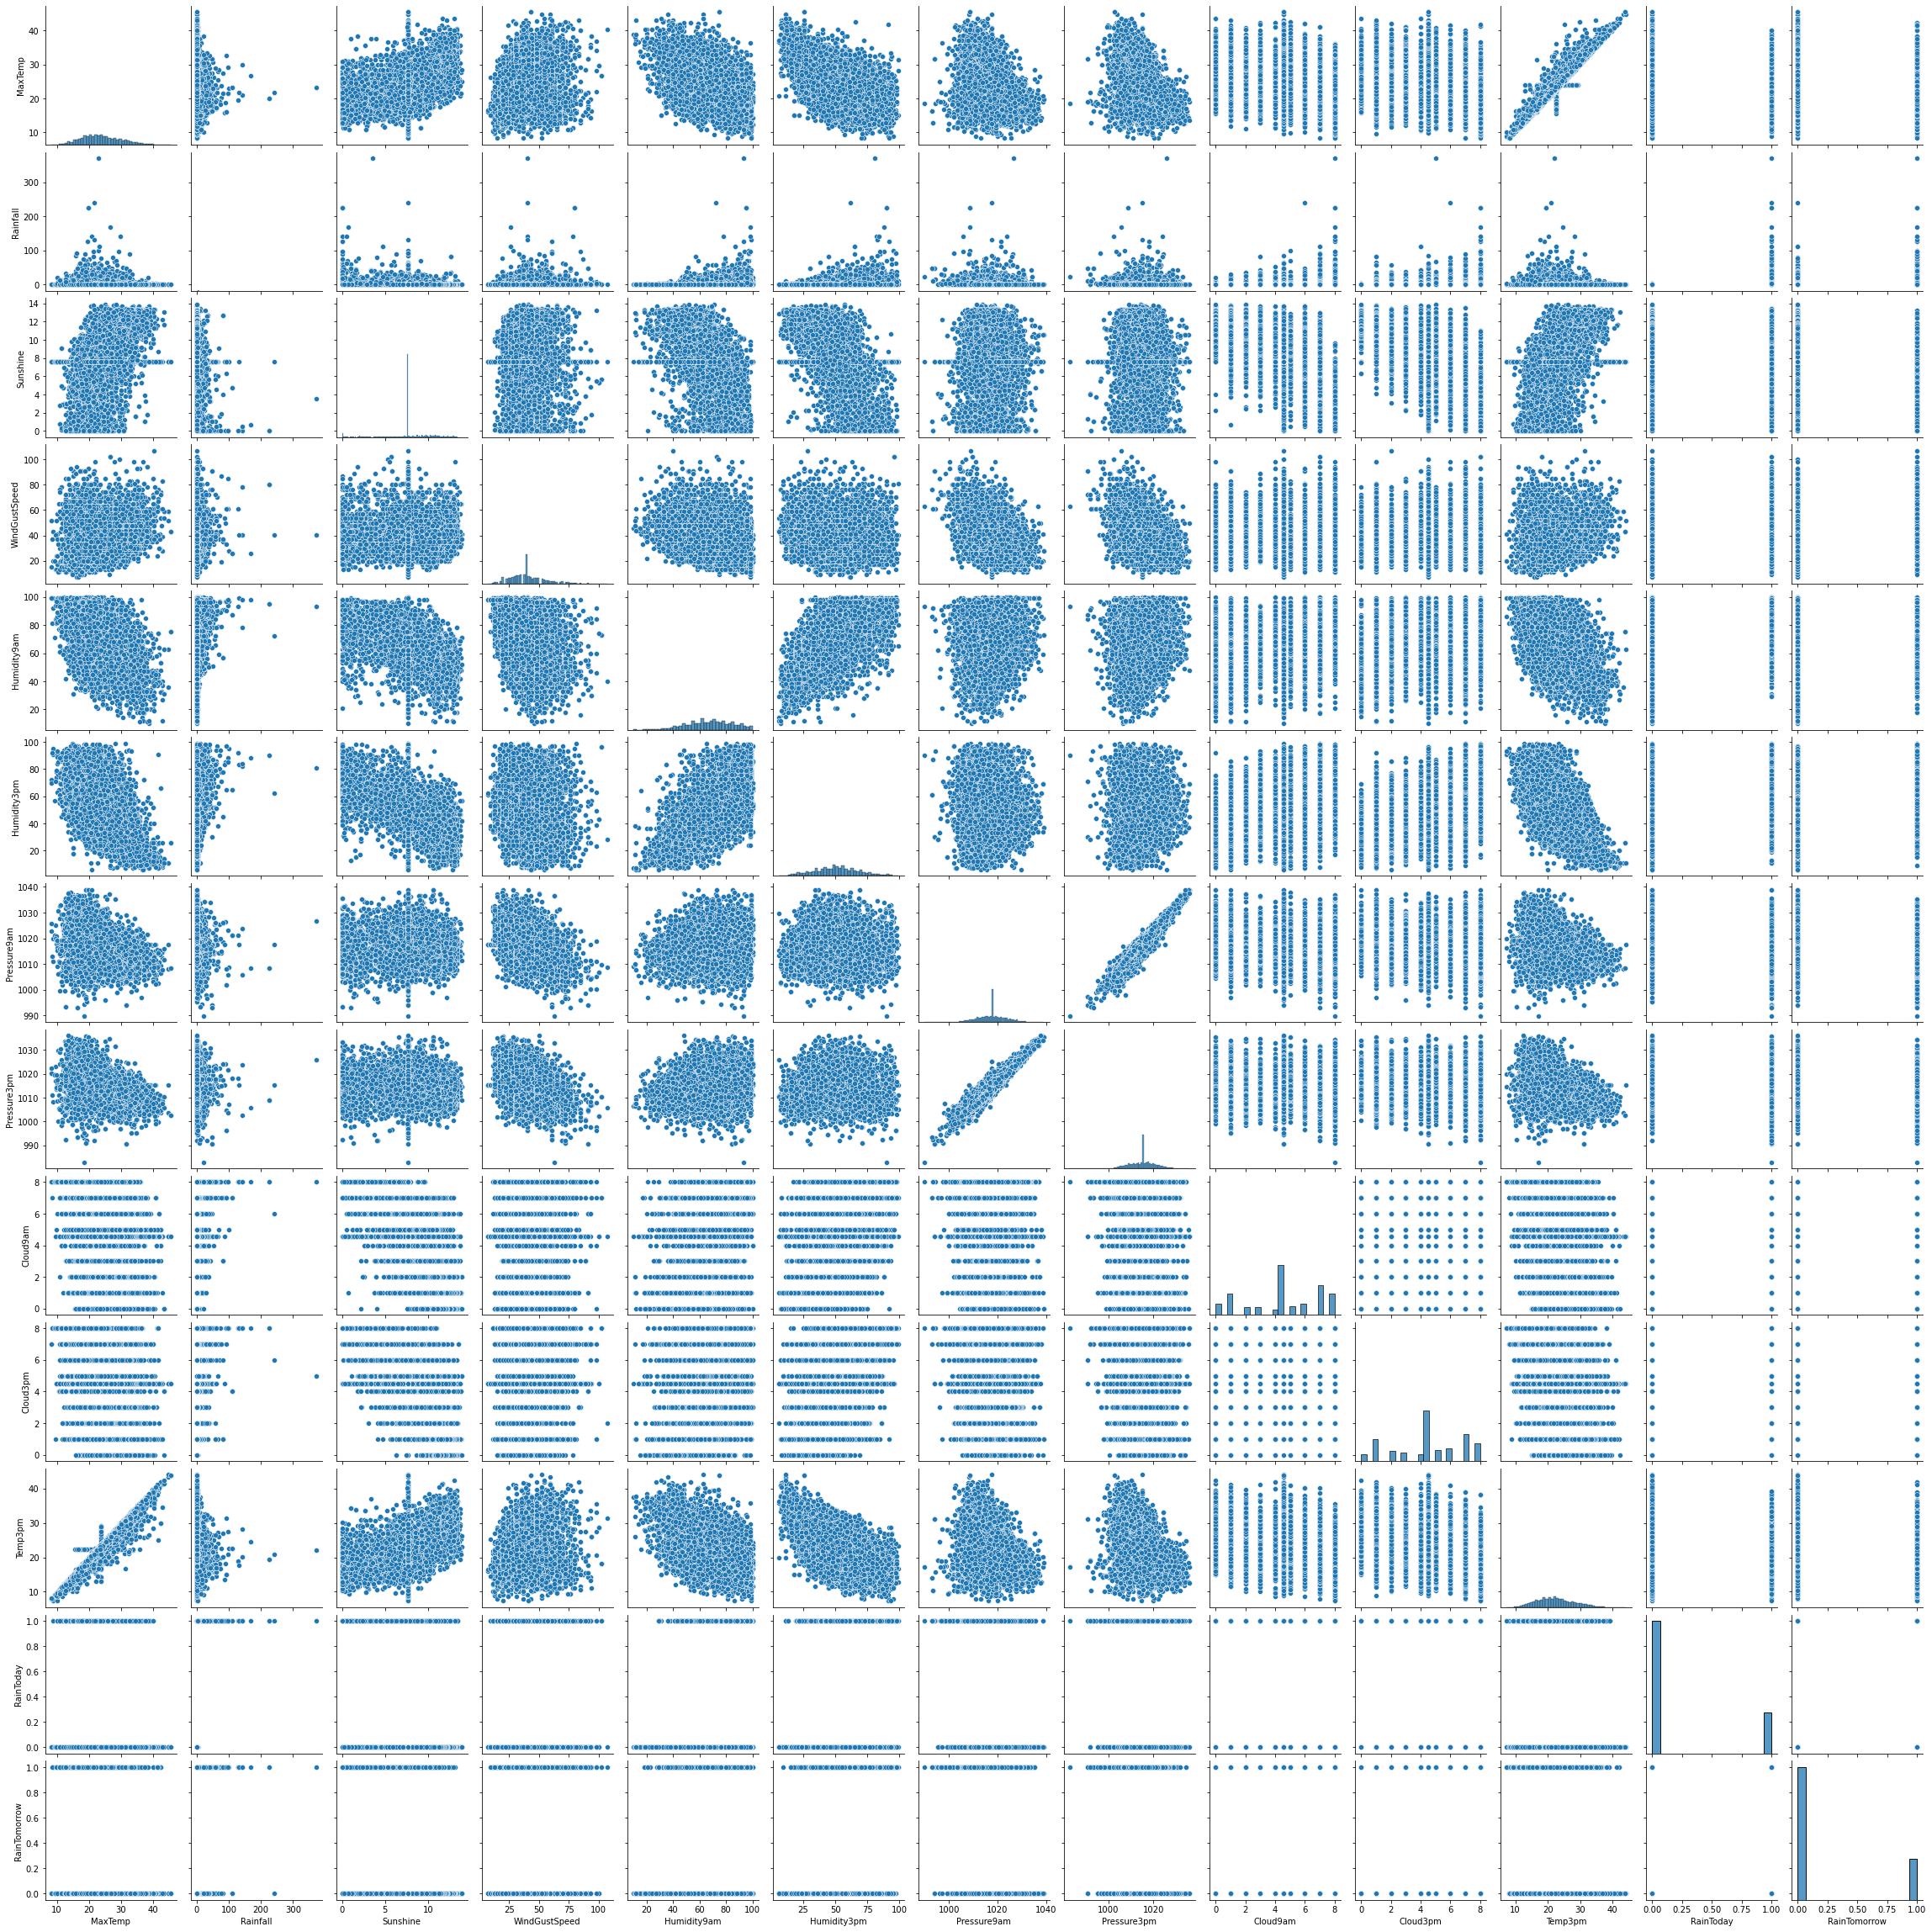

In [106]:
sns.pairplot(df1)
#to visually see positive , negative colrrelat

In [34]:
df1.columns

Index(['MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

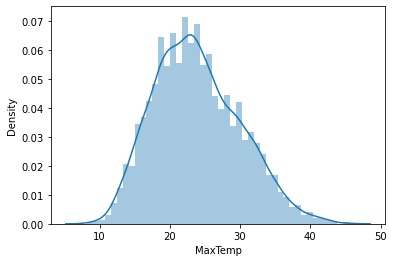

In [35]:
#we will check the data distribution using distplots
sns.distplot(df1['MaxTemp'])

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

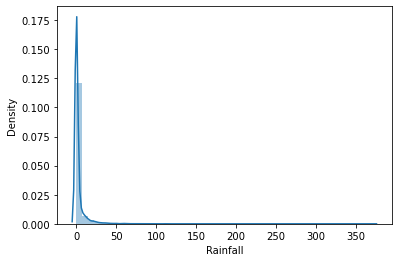

In [36]:
sns.distplot(df1['Rainfall'])

<AxesSubplot:xlabel='Sunshine', ylabel='Density'>

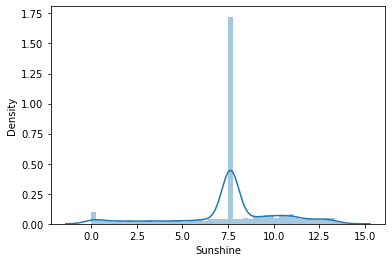

In [37]:
sns.distplot(df1['Sunshine'])

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

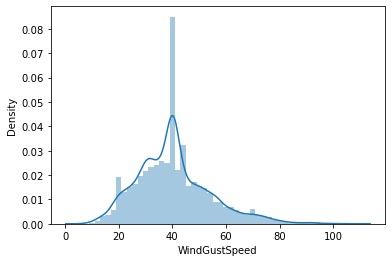

In [38]:
sns.distplot(df1['WindGustSpeed'])

<AxesSubplot:xlabel='Humidity9am', ylabel='Density'>

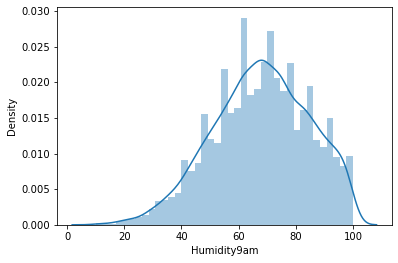

In [39]:
sns.distplot(df1['Humidity9am'])

<AxesSubplot:xlabel='Humidity3pm', ylabel='Density'>

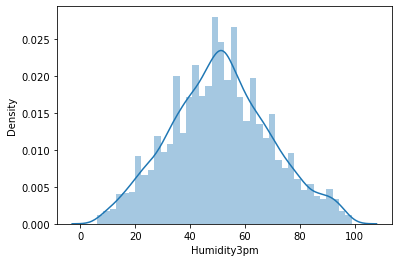

In [40]:
sns.distplot(df1['Humidity3pm'])

<AxesSubplot:xlabel='Pressure9am', ylabel='Density'>

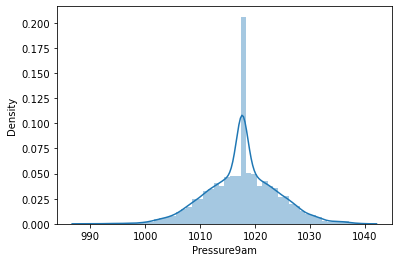

In [41]:
sns.distplot(df1['Pressure9am'])

<AxesSubplot:xlabel='Pressure3pm', ylabel='Density'>

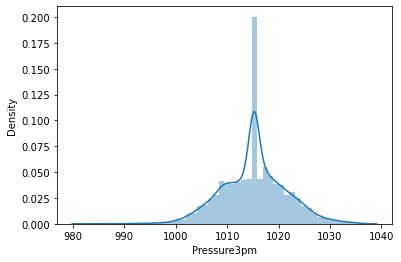

In [42]:
sns.distplot(df1['Pressure3pm'])

<AxesSubplot:xlabel='Cloud9am', ylabel='Density'>

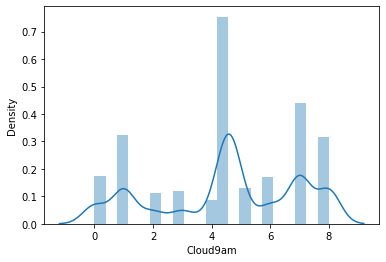

In [43]:
sns.distplot(df1['Cloud9am'])

<AxesSubplot:xlabel='Cloud3pm', ylabel='Density'>

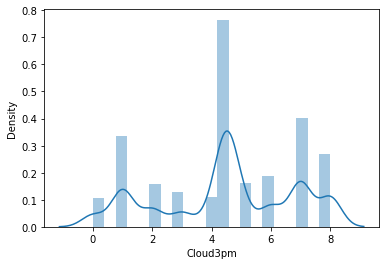

In [44]:
sns.distplot(df1['Cloud3pm'])

<AxesSubplot:xlabel='Temp3pm', ylabel='Density'>

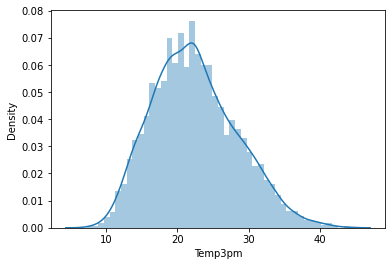

In [45]:
sns.distplot(df1['Temp3pm'])

<AxesSubplot:xlabel='RainToday', ylabel='Density'>

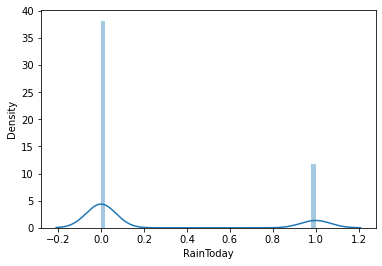

In [46]:
sns.distplot(df1['RainToday'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='Density'>

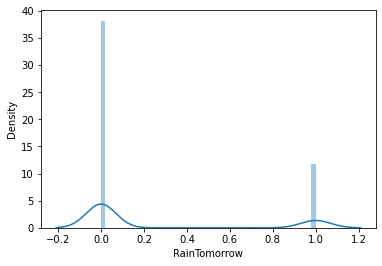

In [47]:
sns.distplot(df1['RainTomorrow'])

MaxTemp             AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Rainfall         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Sunshine         AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
WindGustSpeed    AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Humidity9am      AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Humidity3pm      AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Pressure9am      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Pressure3pm            AxesSubplot(0.125,0.125;0.0945122x0.343182)
Cloud9am            AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Cloud3pm            AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Temp3pm             AxesSubplot(0.465244,0.125;0.0945122x0.343182)
RainToday           AxesSubplot(0.578659,0.125;0.0945122x0.343182)
RainTomorrow        AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

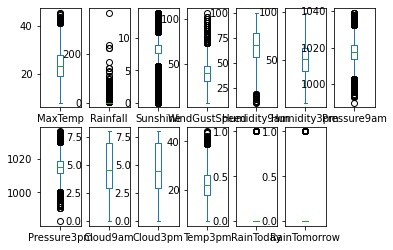

In [48]:
df1.plot(kind='box',subplots=True,layout=(2,7))
#from the above ditribution and below box plot the data clearly displays outliers which needs to be removed as per next code

As we have outliers in the data so we need to remove outliers first

In [107]:
#removing outliers from the  data using Zscore value
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

MaxTemp  Rainfall      Sunshine  WindGustSpeed  Humidity9am  \
0     1.570089e-01  0.213986  3.143679e-16       0.277710     0.189439   
1     2.028121e-01  0.272189  3.143679e-16       0.277710     1.420268   
2     3.009450e-01  0.272189  3.143679e-16       0.422897     1.777981   
3     6.771214e-01  0.272189  3.143679e-16       1.174166     1.360650   
4     1.380408e+00  0.175183  3.143679e-16       0.059928     0.845246   
...            ...       ...           ...            ...          ...   
8420  7.523137e-02  0.272189  3.143679e-16       0.666009     1.002937   
8421  2.355231e-01  0.272189  3.143679e-16       1.319354     0.704843   
8422  4.972110e-01  0.272189  3.143679e-16       0.230447     0.883699   
8423  5.135665e-01  0.272189  3.143679e-16       0.883791     1.002937   
8424  5.810639e-16  0.272189  3.143679e-16       0.000000     0.347130   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am      Cloud3pm   Temp3pm  \
0        1.597406     1.584003     1.308665  1.413459  3.862851e-16  0.108138   
1        1.433568     1.121880     1.196072  0.000000  3.862851e-16  0.312348   
2        1.160505     1.599939     1.051309  0.000000  1.088680e+00  0.127334   
3        1.925081     0.006411     0.391836  0.000000  3.862851e-16  0.682376   
4        0.996668     1.090010     1.485596  1.001777  1.520830e+00  1.220599   
...           ...          ...          ...       ...           ...       ...   
8420     1.488181     1.109058     0.814518  0.000000  3.862851e-16  0.007221   
8421     1.652018     0.933770     0.621501  0.000000  3.862851e-16  0.345987   
8422     1.488181     0.535388     0.251553  0.000000  3.862851e-16  0.615099   
8423     1.488181     0.280424     0.203299  0.644950  1.088680e+00  0.598279   
8424     0.832830     0.407906     0.428485  1.413459  1.520830e+00  0.259513   

      RainToday  RainTomorrow  
0      0.556099      0.556282  
1      0.556099      0.556282  
2      0.556099      0.556282  
3      0.556099      0.556282  
4      0.556099      0.556282  
...         ...           ...  
8420   0.556099      0.556282  
8421   0.556099      0.556282  
8422   0.556099      0.556282  
8423   0.556099      0.556282  
8424   0.556099      0.556282  

[8425 rows x 13 columns]

In [108]:
z=np.abs(zscore(df1))

In [109]:
z.shape

(8425, 13)

In [52]:
threshold=3
print(np.where(z>3))

(array([  12,   12,   44,   44,   52,   60,   60,   61,   61,   62,   62,
         62,   67,   68,   68,  123,  267,  296,  381,  405,  406,  407,
        407,  431,  462,  563,  568,  568,  569,  602,  683,  683,  699,
        713,  748,  748,  770,  796,  797,  802,  928,  935,  949,  979,
        980,  980, 1008, 1009, 1011, 1138, 1148, 1149, 1151, 1202, 1203,
       1237, 1241, 1264, 1265, 1357, 1411, 1412, 1413, 1479, 1480, 1481,
       1513, 1661, 1673, 1680, 1774, 1819, 1873, 2063, 2108, 2116, 2201,
       2231, 2265, 2429, 2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676,
       2677, 2735, 2849, 2859, 2890, 2898, 2900, 2901, 2909, 3003, 3051,
       3051, 3058, 3059, 3059, 3060, 3066, 3067, 3070, 3082, 3089, 3099,
       3167, 3212, 3234, 3248, 3271, 3278, 3291, 3291, 3302, 3302, 3303,
       3350, 3419, 3421, 3430, 3449, 3449, 3449, 3449, 3450, 3450, 3491,
       3571, 3602, 3603, 3607, 3621, 3701, 3711, 3742, 3750, 3752, 3753,
       3761, 3855, 3903, 3903, 3910, 3911, 3911, 3

In [110]:
len(np.where(z>3)[0])

332

In [111]:
df2=df1[(z<3).all(axis=1)]

In [112]:
print("old dataframe",df1.shape)
print("new dataframe",df2.shape)
print("total dropped",df1.shape[0]-df2.shape[0])

old dataframe (8425, 13)
new dataframe (8156, 13)
total dropped 269


In [56]:
loss_percent=(8425-8156)/8425*100
print(loss_percent,"%")
#here by removing the outliers loosign 3.2% of data which is fine as it will help in gettign better model accuracy

3.1928783382789314 %


In [57]:
#we will now check skewness in data
df2.skew()

MaxTemp          0.310255
Rainfall         3.499523
Sunshine        -0.711643
WindGustSpeed    0.543813
Humidity9am     -0.219176
Humidity3pm      0.130509
Pressure9am      0.008012
Pressure3pm      0.042868
Cloud9am        -0.358501
Cloud3pm        -0.269932
Temp3pm          0.329378
RainToday        1.314908
RainTomorrow     1.293213
dtype: float64

In [113]:
# We will break data into input and output and then remove skewness
x=df2.drop("RainTomorrow",axis=1)
y=df2["RainTomorrow"]

In [59]:
x

MaxTemp  Rainfall  Sunshine  WindGustSpeed  Humidity9am  Humidity3pm  \
0     22.900000       0.6  7.632205      44.000000         71.0         22.0   
1     25.100000       0.0  7.632205      44.000000         44.0         25.0   
2     25.700000       0.0  7.632205      46.000000         38.0         30.0   
3     28.000000       0.0  7.632205      24.000000         45.0         16.0   
4     32.300000       1.0  7.632205      41.000000         82.0         33.0   
...         ...       ...       ...            ...          ...          ...   
8420  23.400000       0.0  7.632205      31.000000         51.0         24.0   
8421  25.300000       0.0  7.632205      22.000000         56.0         21.0   
8422  26.900000       0.0  7.632205      37.000000         53.0         24.0   
8423  27.000000       0.0  7.632205      28.000000         51.0         24.0   
8424  23.859976       0.0  7.632205      40.174469         62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp3pm  RainToday  
0          1007.7       1007.1  8.000000  4.503183     21.8        0.0  
1          1010.6       1007.8  4.566622  4.503183     24.3        0.0  
2          1007.6       1008.7  4.566622  2.000000     23.2        0.0  
3          1017.6       1012.8  4.566622  4.503183     26.5        0.0  
4          1010.8       1006.0  7.000000  8.000000     29.7        0.0  
...           ...          ...       ...       ...      ...        ...  
8420       1024.6       1020.3  4.566622  4.503183     22.4        0.0  
8421       1023.5       1019.1  4.566622  4.503183     24.5        0.0  
8422       1021.0       1016.8  4.566622  4.503183     26.1        0.0  
8423       1019.4       1016.5  3.000000  2.000000     26.0        0.0  
8424       1020.2       1017.9  8.000000  8.000000     20.9        0.0  

[8156 rows x 12 columns]

In [60]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: RainTomorrow, Length: 8156, dtype: float64

In [114]:
#checking vif to identify multicollinierity 
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
calc_vif(x)


Variables     VIF Factor
0         MaxTemp     418.934347
1        Rainfall       2.269590
2        Sunshine      14.823272
3   WindGustSpeed      12.091405
4     Humidity9am      38.134126
5     Humidity3pm      22.064504
6     Pressure9am  434345.915878
7     Pressure3pm  433598.048363
8        Cloud9am       7.998721
9        Cloud3pm       8.632066
10        Temp3pm     418.272803
11      RainToday       2.688412

We will drop MaxTemp,Rainfall,Pressure3pm,Cloud9am,WindGustSpeed to remove multicollinierity as they have very close VIF with other columns

In [115]:
x1=x.drop(['MaxTemp','Rainfall','Pressure3pm','Cloud9am','WindGustSpeed'],axis=1)
x1

Sunshine  Humidity9am  Humidity3pm  Pressure9am  Cloud3pm  Temp3pm  \
0     7.632205         71.0         22.0       1007.7  4.503183     21.8   
1     7.632205         44.0         25.0       1010.6  4.503183     24.3   
2     7.632205         38.0         30.0       1007.6  2.000000     23.2   
3     7.632205         45.0         16.0       1017.6  4.503183     26.5   
4     7.632205         82.0         33.0       1010.8  8.000000     29.7   
...        ...          ...          ...          ...       ...      ...   
8420  7.632205         51.0         24.0       1024.6  4.503183     22.4   
8421  7.632205         56.0         21.0       1023.5  4.503183     24.5   
8422  7.632205         53.0         24.0       1021.0  4.503183     26.1   
8423  7.632205         51.0         24.0       1019.4  2.000000     26.0   
8424  7.632205         62.0         36.0       1020.2  8.000000     20.9   

      RainToday  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
8420        0.0  
8421        0.0  
8422        0.0  
8423        0.0  
8424        0.0  

[8156 rows x 7 columns]

As this is Binary classification problem and we can see imbalance data so will use Smote technique to balance the data

In [116]:
#Transform data to remove skewness
from sklearn.preprocessing import power_transform

In [117]:
x2=power_transform(x1,method='yeo-johnson')
pd.DataFrame(x2).skew()

0   -0.063986
1   -0.063648
2   -0.036572
3    0.000276
4   -0.219369
5   -0.013853
6    1.314908
dtype: float64

In [118]:
#using scaling technique for scaling of independent data
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x2=st.fit_transform(x2)
x2

array([[-0.09728587,  0.167151  , -1.67222699, ..., -0.00356632,
        -0.03639508, -0.53936523],
       [-0.09728587, -1.41570478, -1.48431943, ..., -0.00356632,
         0.38251504, -0.53936523],
       [-0.09728587, -1.73849269, -1.17920395, ..., -1.08501628,
         0.20123346, -0.53936523],
       ...,
       [-0.09728587, -0.91010635, -1.54651524, ..., -0.00356632,
         0.66974737, -0.53936523],
       [-0.09728587, -1.0245362 , -1.54651524, ..., -1.08501628,
         0.65407953, -0.53936523],
       [-0.09728587, -0.38166575, -0.82409603, ...,  1.55961649,
        -0.1935612 , -0.53936523]])

Now we have our input and output ready to be tested for model , As our output is Binary , we will test with Logistic Regression

In [119]:
lr=LogisticRegression()

In [120]:
#finding best random state

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x2_train,x2_test,y_train,y_test=train_test_split(x2,y,test_size=.20,random_state=i)
    lr.fit(x2_train,y_train)
    predlr=lr.predict(x2_test)
    acc=accuracy_score(y_test,predlr)
    print('accuracy',acc,'random_state',i)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best Accuracy is",maxAccu,"on Random State",maxRS)

accuracy 0.8296568627450981 random_state 1
accuracy 0.8376225490196079 random_state 2
accuracy 0.8296568627450981 random_state 3
accuracy 0.852328431372549 random_state 4
accuracy 0.8106617647058824 random_state 5
accuracy 0.8235294117647058 random_state 6
accuracy 0.821078431372549 random_state 7
accuracy 0.8167892156862745 random_state 8
accuracy 0.8370098039215687 random_state 9
accuracy 0.8253676470588235 random_state 10
accuracy 0.8204656862745098 random_state 11
accuracy 0.8265931372549019 random_state 12
accuracy 0.8388480392156863 random_state 13
accuracy 0.8149509803921569 random_state 14
accuracy 0.8253676470588235 random_state 15
accuracy 0.803921568627451 random_state 16
accuracy 0.8057598039215687 random_state 17
accuracy 0.8241421568627451 random_state 18
accuracy 0.8026960784313726 random_state 19
accuracy 0.8345588235294118 random_state 20
accuracy 0.8370098039215687 random_state 21
accuracy 0.8357843137254902 random_state 22
accuracy 0.8106617647058824 random_state 23


accuracy 0.8100490196078431 random_state 188
accuracy 0.8180147058823529 random_state 189
accuracy 0.8149509803921569 random_state 190
accuracy 0.8186274509803921 random_state 191
accuracy 0.8265931372549019 random_state 192
accuracy 0.8247549019607843 random_state 193
accuracy 0.8198529411764706 random_state 194
accuracy 0.8186274509803921 random_state 195
accuracy 0.8229166666666666 random_state 196
accuracy 0.8216911764705882 random_state 197
accuracy 0.8290441176470589 random_state 198
accuracy 0.8443627450980392 random_state 199
Best Accuracy is 0.852328431372549 on Random State 4


In [121]:
#Applying the above parameters to Logistic Regression 
lr=LogisticRegression()
x2_train,x2_test,y_train,y_test=train_test_split(x2,y,test_size=.20,random_state=4)
lr.fit(x2_train,y_train)
predlr=lr.predict(x2_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
cvscore=cross_val_score(lr,x2,y,cv=5)
cvm=cvscore.mean()
print("cross val score:",cvm)

0.852328431372549
[[1221   64]
 [ 177  170]]
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1285
         1.0       0.73      0.49      0.59       347

    accuracy                           0.85      1632
   macro avg       0.80      0.72      0.75      1632
weighted avg       0.84      0.85      0.84      1632

cross val score: 0.8207415154903164


In [123]:
#Lets try with RandomForest Classifier model
from sklearn.ensemble import RandomForestClassifier
rfs=RandomForestClassifier(n_estimators=100,random_state=4)
rfs.fit(x2_train,y_train)
predrfs=rfs.predict(x2_test)
print(accuracy_score(y_test,predrfs))
print(confusion_matrix(y_test,predrfs))
print(classification_report(y_test,predrfs))
cvscore1=cross_val_score(rfs,x2,y,cv=5)
cvm1=cvscore1.mean()
print("cross val score:",cvm1)

0.8927696078431373
[[1231   54]
 [ 121  226]]
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      1285
         1.0       0.81      0.65      0.72       347

    accuracy                           0.89      1632
   macro avg       0.86      0.80      0.83      1632
weighted avg       0.89      0.89      0.89      1632

cross val score: 0.849684047438718


In [124]:
#using Kneighbors Classifier to check results
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x2_train,y_train)
knn.score(x2_train,y_train)
predknn=knn.predict(x2_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))
cvscore2=cross_val_score(knn,x2,y,cv=5)
cvm2=cvscore2.mean()
print("cross val score:",cvm2)

0.8284313725490197
[[1171  114]
 [ 166  181]]
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      1285
         1.0       0.61      0.52      0.56       347

    accuracy                           0.83      1632
   macro avg       0.74      0.72      0.73      1632
weighted avg       0.82      0.83      0.82      1632

cross val score: 0.7999021711688967


In [126]:
#using support vector classifier
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x2_train,y_train)
svc.score(x2_train,y_train)
predsvc=svc.predict(x2_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
cvscore3=cross_val_score(svc,x2,y,cv=5)
cvm3=cvscore3.mean()
print("cross val score:",cvm3)

0.852328431372549
[[1246   39]
 [ 202  145]]
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      1285
         1.0       0.79      0.42      0.55       347

    accuracy                           0.85      1632
   macro avg       0.82      0.69      0.73      1632
weighted avg       0.85      0.85      0.83      1632

cross val score: 0.825035765379113


In [127]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x2_train,y_train)
dtc.score(x2_train,y_train)
preddtc=dtc.predict(x2_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
cvscore4=cross_val_score(dtc,x2,y,cv=5)
cvm4=cvscore4.mean()
print("cross val score:",cvm4)

0.8529411764705882
[[1145  140]
 [ 100  247]]
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91      1285
         1.0       0.64      0.71      0.67       347

    accuracy                           0.85      1632
   macro avg       0.78      0.80      0.79      1632
weighted avg       0.86      0.85      0.86      1632

cross val score: 0.7964760582344527


In [128]:
#Trying to boost the learning of decision tree classifier, estimators by default is 50

from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x2_train,y_train)
ad_pred=ad.predict(x2_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))
cvscore5=cross_val_score(ad,x2,y,cv=5)
cvm5=cvscore5.mean()
print("cross val score:",cvm5)

0.8480392156862745
[[1212   73]
 [ 175  172]]
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      1285
         1.0       0.70      0.50      0.58       347

    accuracy                           0.85      1632
   macro avg       0.79      0.72      0.74      1632
weighted avg       0.84      0.85      0.84      1632

cross val score: 0.8180461884324546


In [130]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x2_train,y_train)
gb_pred=gb.predict(x2_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))
cvscore6=cross_val_score(gb,x2,y,cv=5)
cvm6=cvscore6.mean()
print("cross val score:",cvm6)

0.8535539215686274
[[1226   59]
 [ 180  167]]
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1285
         1.0       0.74      0.48      0.58       347

    accuracy                           0.85      1632
   macro avg       0.81      0.72      0.75      1632
weighted avg       0.84      0.85      0.84      1632

cross val score: 0.8212338154145777


Hypertuning below for the algorithm selected as Random Forest Classifier

In [131]:
RandomForestClassifier()

RandomForestClassifier()

In [132]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
              'criterion' :['gini','entropy']}

In [133]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x2_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_features': 'sqrt'}

In [134]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [135]:
GCV.best_estimator_

RandomForestClassifier(max_features='sqrt')

In [136]:
GCV_pred=GCV.best_estimator_.predict(x2_test)
accuracy_score(y_test,GCV_pred)
print(accuracy_score(y_test,GCV_pred))
print(confusion_matrix(y_test,GCV_pred))
print(classification_report(y_test,GCV_pred))
cvscore7=cross_val_score(GCV.best_estimator_,x2,y,cv=5)
cvm7=cvscore7.mean()
print("cross val score:",cvm7)

0.897671568627451
[[1236   49]
 [ 118  229]]
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94      1285
         1.0       0.82      0.66      0.73       347

    accuracy                           0.90      1632
   macro avg       0.87      0.81      0.83      1632
weighted avg       0.89      0.90      0.89      1632

cross val score: 0.8500515442228395


Logistic Regression comes with 85% accuracy score , 85% accuracy in F1 Score and 82 % Cross Val Score

RandomForestClassifier 89% accuracy score ,89 % accuracy in F1 score and 84 % Cross Val score

KNeighborsClassifier 82 % accuracy , 83 % accuracy in F1 score and 79 % Cross Val score

support vector classifier using kernel as poly 85 % accuracy , 85 % accuracy in F1 score and 82 % Cross Val score

DecisionTreeClassifier 85% accuracy , 85 % accuracy in F1 score and 79 % Cross Val score

AdaBoostClassifier 84 % accuracy , 85 % accuracy in F1 score and 81 % Cross Val score

GradientBoostingClassifier 85 % accuracy , 85 % accuracy in F1 score and 82 % Cross Val score

By doing Hypertuning using RandomForestClassifier with best param 89 % accuracy , 90 % accuracy in F1 score and 85 % Cross Val score

We select Hypertuned Random Forest Classifier which has 89 % accuracy , 90 % accuracy in F1 score and 85 % Cross Val score as final model


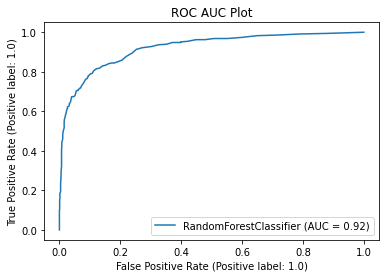

In [137]:
#Lets plot AUC ROC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x2_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

In [138]:
#we will save this model
import pickle

In [139]:
filename='Weatherforecast.pkl'
pickle.dump(GCV.best_estimator_,open(filename,'wb'))

In [140]:
#Conclusion 
loaded_model=pickle.load(open('Weatherforecast.pkl','rb'))
result=loaded_model.score(x2_test,y_test)
print(result)
                        

0.897671568627451


In [141]:
#predicting the rain tomorrow using the model saved
conclusion=pd.DataFrame([loaded_model.predict(x2_test)[:],GCV_pred[:]],index=["Predicted","Original"])
conclusion

0     1     2     3     4     5     6     7     8     9     ...  \
Predicted   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0  ...   
Original    0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0  ...   

           1622  1623  1624  1625  1626  1627  1628  1629  1630  1631  
Predicted   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
Original    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[2 rows x 1632 columns]

# Part 2-Predicting Amount of rainfall

In [142]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [143]:
df.dtypes

Date             float64
Location         float64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir      float64
WindGustSpeed    float64
WindDir9am       float64
WindDir3pm       float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object

Above tells all datatypes are float and none of them is NULL
Our target is Rainfall which is a continues variable 

In [144]:
#as we will predict Rainfall so need to check its correlation with other data columns
dfcorr["Rainfall"].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.461106
Humidity3pm      0.235444
Humidity9am      0.228800
RainTomorrow     0.220021
Cloud9am         0.185444
Cloud3pm         0.150760
WindDir9am       0.093821
MinTemp          0.087684
WindGustSpeed    0.086000
WindSpeed9am     0.050631
WindGustDir      0.038812
WindDir3pm       0.038560
WindSpeed3pm     0.024791
Evaporation      0.023517
Location         0.007693
Date             0.004945
Temp9am         -0.007083
Pressure3pm     -0.033649
Pressure9am     -0.072668
MaxTemp         -0.087451
Temp3pm         -0.090687
Sunshine        -0.169432
Name: Rainfall, dtype: float64


From the above checks using correlation , we will drop below columns due to very low correlation
'WindDir9am','MinTemp','WindGustSpeed','WindSpeed9am','WindGustDir','WindDir3pm',WindSpeed3pm','Evaporation','Location','Date','Temp9am','MaxTemp','Temp3pm'


In [145]:
dfn=df.drop(['WindDir9am','MinTemp','WindGustSpeed','WindSpeed9am','WindGustDir','WindDir3pm','WindSpeed3pm','Evaporation','Location','Date','Temp9am','MaxTemp','Temp3pm'],axis=1)
dfn

Rainfall  Sunshine  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0          0.6  7.632205         71.0         22.0       1007.7       1007.1   
1          0.0  7.632205         44.0         25.0       1010.6       1007.8   
2          0.0  7.632205         38.0         30.0       1007.6       1008.7   
3          0.0  7.632205         45.0         16.0       1017.6       1012.8   
4          1.0  7.632205         82.0         33.0       1010.8       1006.0   
...        ...       ...          ...          ...          ...          ...   
8420       0.0  7.632205         51.0         24.0       1024.6       1020.3   
8421       0.0  7.632205         56.0         21.0       1023.5       1019.1   
8422       0.0  7.632205         53.0         24.0       1021.0       1016.8   
8423       0.0  7.632205         51.0         24.0       1019.4       1016.5   
8424       0.0  7.632205         62.0         36.0       1020.2       1017.9   

      Cloud9am  Cloud3pm  RainToday  RainTomorrow  
0     8.000000  4.503183        0.0           0.0  
1     4.566622  4.503183        0.0           0.0  
2     4.566622  2.000000        0.0           0.0  
3     4.566622  4.503183        0.0           0.0  
4     7.000000  8.000000        0.0           0.0  
...        ...       ...        ...           ...  
8420  4.566622  4.503183        0.0           0.0  
8421  4.566622  4.503183        0.0           0.0  
8422  4.566622  4.503183        0.0           0.0  
8423  3.000000  2.000000        0.0           0.0  
8424  8.000000  8.000000        0.0           0.0  

[8425 rows x 10 columns]

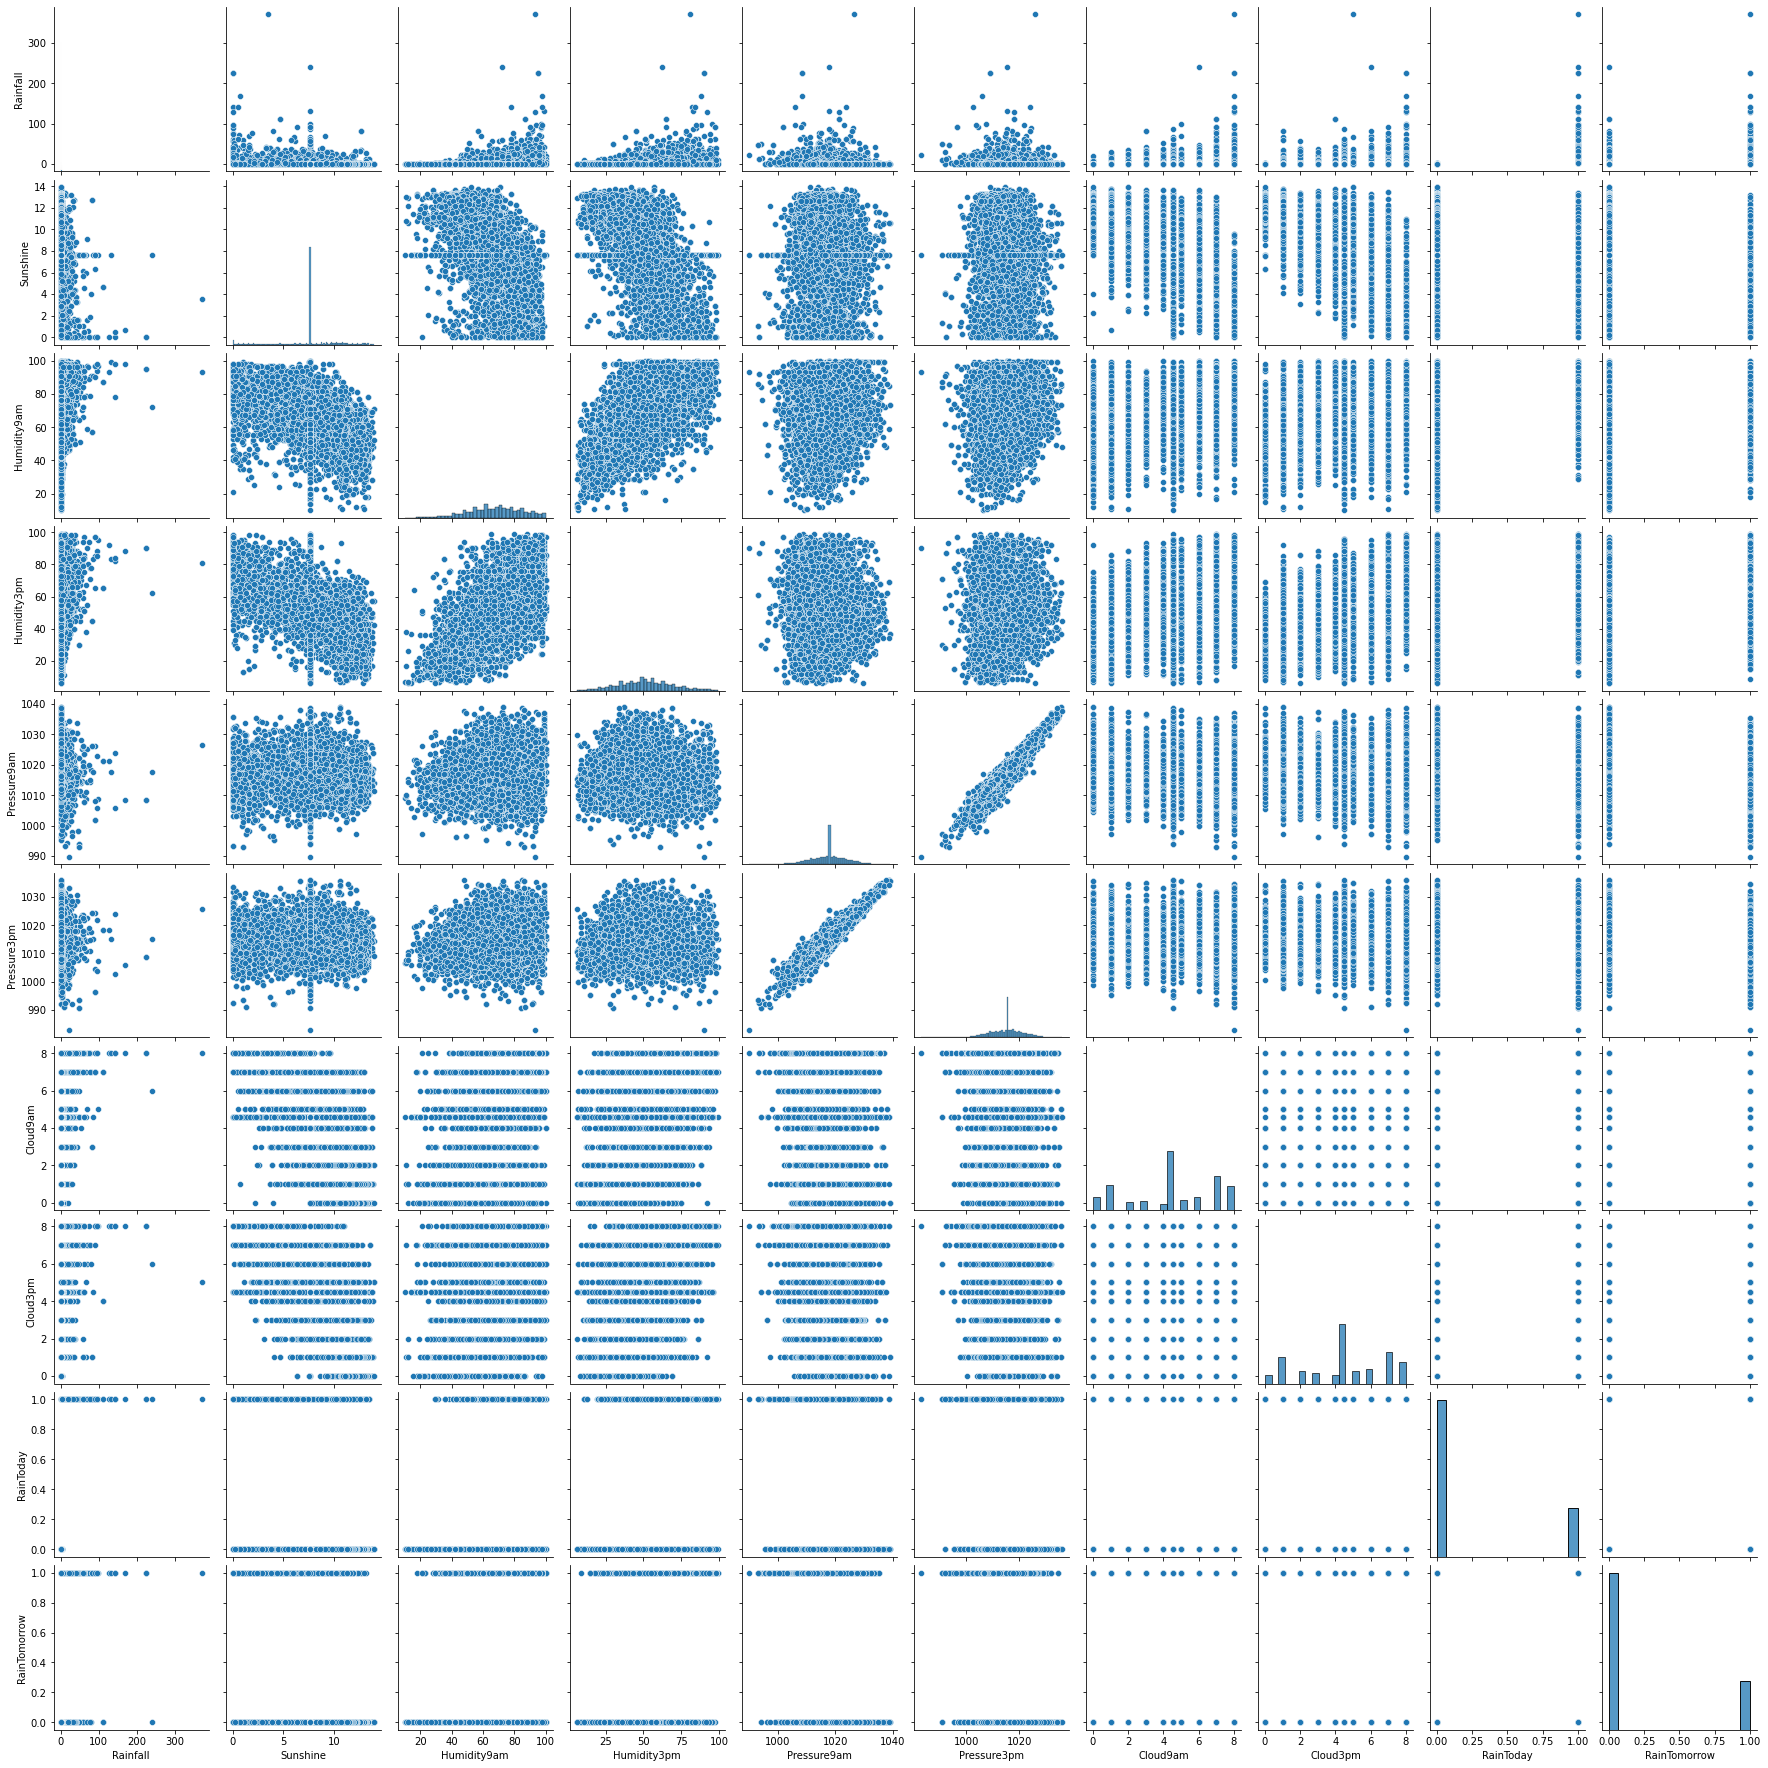

In [146]:
#Drawing a pairplot to view the correlation
sns.pairplot(dfn)

In [147]:
dfn.columns

Index(['Rainfall', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

we had already seen in distribution plot and box plot in part 1 that data has outliers which are to be removed hence i will not repeat few EDA steps which had been done earlier

We will remove outliers using z score method

In [148]:
from scipy.stats import zscore
z=np.abs(zscore(dfn))
z

Rainfall      Sunshine  Humidity9am  Humidity3pm  Pressure9am  \
0     0.213986  3.143679e-16     0.189439     1.597406     1.584003   
1     0.272189  3.143679e-16     1.420268     1.433568     1.121880   
2     0.272189  3.143679e-16     1.777981     1.160505     1.599939   
3     0.272189  3.143679e-16     1.360650     1.925081     0.006411   
4     0.175183  3.143679e-16     0.845246     0.996668     1.090010   
...        ...           ...          ...          ...          ...   
8420  0.272189  3.143679e-16     1.002937     1.488181     1.109058   
8421  0.272189  3.143679e-16     0.704843     1.652018     0.933770   
8422  0.272189  3.143679e-16     0.883699     1.488181     0.535388   
8423  0.272189  3.143679e-16     1.002937     1.488181     0.280424   
8424  0.272189  3.143679e-16     0.347130     0.832830     0.407906   

      Pressure3pm  Cloud9am      Cloud3pm  RainToday  RainTomorrow  
0        1.308665  1.413459  3.862851e-16   0.556099      0.556282  
1        1.196072  0.000000  3.862851e-16   0.556099      0.556282  
2        1.051309  0.000000  1.088680e+00   0.556099      0.556282  
3        0.391836  0.000000  3.862851e-16   0.556099      0.556282  
4        1.485596  1.001777  1.520830e+00   0.556099      0.556282  
...           ...       ...           ...        ...           ...  
8420     0.814518  0.000000  3.862851e-16   0.556099      0.556282  
8421     0.621501  0.000000  3.862851e-16   0.556099      0.556282  
8422     0.251553  0.000000  3.862851e-16   0.556099      0.556282  
8423     0.203299  0.644950  1.088680e+00   0.556099      0.556282  
8424     0.428485  1.413459  1.520830e+00   0.556099      0.556282  

[8425 rows x 10 columns]

In [149]:
z=np.abs(zscore(dfn))

In [150]:
z.shape

(8425, 10)

In [151]:
threshold=3
print(np.where(z>3))

(array([  12,   12,  296,  431,  462,  568,  568,  569,  602,  683,  683,
        699,  713,  748,  748,  770,  796,  797,  802,  928,  935,  949,
        979,  980, 1008, 1009, 1011, 1138, 1148, 1149, 1151, 1202, 1203,
       1237, 1241, 1264, 1265, 1357, 1411, 1412, 1413, 1479, 1480, 1481,
       1513, 1661, 1673, 1680, 1774, 1819, 1873, 2063, 2108, 2116, 2201,
       2231, 2265, 2429, 2488, 2541, 2593, 2676, 2677, 2735, 2849, 2890,
       2898, 2900, 2901, 2909, 3003, 3051, 3051, 3058, 3059, 3059, 3060,
       3167, 3212, 3248, 3303, 3350, 3419, 3421, 3430, 3449, 3449, 3449,
       3450, 3571, 3607, 3621, 3701, 3742, 3750, 3752, 3753, 3761, 3855,
       3903, 3903, 3910, 3911, 3911, 3912, 4019, 4064, 4100, 4155, 4202,
       4271, 4273, 4282, 4301, 4301, 4301, 4302, 4423, 4459, 4473, 4528,
       4528, 4568, 4568, 4650, 4673, 4678, 4678, 4779, 4780, 4780, 4814,
       4854, 4854, 4895, 4895, 4911, 4960, 4960, 5010, 5122, 5122, 5123,
       5138, 5175, 5176, 5176, 5214, 5214, 5214, 5

In [152]:
len(np.where(z>3)[0])

231

In [153]:
df3=dfn[(z<3).all(axis=1)]

In [154]:
print("old dataframe",dfn.shape)
print("new dataframe",df3.shape)
print("total dropped",dfn.shape[0]-df3.shape[0])

old dataframe (8425, 10)
new dataframe (8232, 10)
total dropped 193


In [155]:
loss_percent=(8425-8232)/8425*100
print(loss_percent,"%")
#here by removing the outliers loosign 2.29% of data which is fine as it will help in gettign better model accuracy

2.2908011869436202 %


In [156]:
#we will now check skewness in data
df3.skew()

Rainfall        3.502697
Sunshine       -0.708967
Humidity9am    -0.216547
Humidity3pm     0.121379
Pressure9am     0.001440
Pressure3pm     0.030170
Cloud9am       -0.359933
Cloud3pm       -0.270088
RainToday       1.318347
RainTomorrow    1.288598
dtype: float64

In [157]:
# We will break data into input and output and then remove skewness
x=df3.drop("Rainfall",axis=1)
y=df3["Rainfall"]


In [158]:
x

Sunshine  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0     7.632205         71.0         22.0       1007.7       1007.1  8.000000   
1     7.632205         44.0         25.0       1010.6       1007.8  4.566622   
2     7.632205         38.0         30.0       1007.6       1008.7  4.566622   
3     7.632205         45.0         16.0       1017.6       1012.8  4.566622   
4     7.632205         82.0         33.0       1010.8       1006.0  7.000000   
...        ...          ...          ...          ...          ...       ...   
8420  7.632205         51.0         24.0       1024.6       1020.3  4.566622   
8421  7.632205         56.0         21.0       1023.5       1019.1  4.566622   
8422  7.632205         53.0         24.0       1021.0       1016.8  4.566622   
8423  7.632205         51.0         24.0       1019.4       1016.5  3.000000   
8424  7.632205         62.0         36.0       1020.2       1017.9  8.000000   

      Cloud3pm  RainToday  RainTomorrow  
0     4.503183        0.0           0.0  
1     4.503183        0.0           0.0  
2     2.000000        0.0           0.0  
3     4.503183        0.0           0.0  
4     8.000000        0.0           0.0  
...        ...        ...           ...  
8420  4.503183        0.0           0.0  
8421  4.503183        0.0           0.0  
8422  4.503183        0.0           0.0  
8423  2.000000        0.0           0.0  
8424  8.000000        0.0           0.0  

[8232 rows x 9 columns]

In [159]:
y

0       0.6
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: Rainfall, Length: 8232, dtype: float64

In [160]:
#checking vif to identify multicollinierity 
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
calc_vif(x)

Variables     VIF Factor
0      Sunshine      14.192059
1   Humidity9am      32.508945
2   Humidity3pm      19.103067
3   Pressure9am  400431.025354
4   Pressure3pm  400468.902829
5      Cloud9am       7.956314
6      Cloud3pm       8.603596
7     RainToday       1.651738
8  RainTomorrow       1.729829

We will drop Pressure9am  to remove multicolliniarity

In [174]:
x1=x.drop(['Pressure9am'],axis=1)
x1

Sunshine  Humidity9am  Humidity3pm  Pressure3pm  Cloud9am  Cloud3pm  \
0     7.632205         71.0         22.0       1007.1  8.000000  4.503183   
1     7.632205         44.0         25.0       1007.8  4.566622  4.503183   
2     7.632205         38.0         30.0       1008.7  4.566622  2.000000   
3     7.632205         45.0         16.0       1012.8  4.566622  4.503183   
4     7.632205         82.0         33.0       1006.0  7.000000  8.000000   
...        ...          ...          ...          ...       ...       ...   
8420  7.632205         51.0         24.0       1020.3  4.566622  4.503183   
8421  7.632205         56.0         21.0       1019.1  4.566622  4.503183   
8422  7.632205         53.0         24.0       1016.8  4.566622  4.503183   
8423  7.632205         51.0         24.0       1016.5  3.000000  2.000000   
8424  7.632205         62.0         36.0       1017.9  8.000000  8.000000   

      RainToday  RainTomorrow  
0           0.0           0.0  
1           0.0           0.0  
2           0.0           0.0  
3           0.0           0.0  
4           0.0           0.0  
...         ...           ...  
8420        0.0           0.0  
8421        0.0           0.0  
8422        0.0           0.0  
8423        0.0           0.0  
8424        0.0           0.0  

[8232 rows x 8 columns]

In [162]:
#Transform data to remove skewness
from sklearn.preprocessing import power_transform

In [175]:
x2=power_transform(x1,method='yeo-johnson')
pd.DataFrame(x2).skew()

0   -0.061873
1   -0.064782
2   -0.038167
3   -0.000152
4   -0.280353
5   -0.218503
6    1.318347
7    1.288598
dtype: float64

In [176]:
#using Min Max Scaling technique
from sklearn.preprocessing import MinMaxScaler
st=MinMaxScaler()
xf=st.fit_transform(x2)
xf

array([[0.44616478, 0.60494146, 0.20666614, ..., 0.54886903, 0.        ,
        0.        ],
       [0.44616478, 0.27273011, 0.24208008, ..., 0.54886903, 0.        ,
        0.        ],
       [0.44616478, 0.20485288, 0.2996702 , ..., 0.23695252, 0.        ,
        0.        ],
       ...,
       [0.44616478, 0.37894733, 0.23035358, ..., 0.54886903, 0.        ,
        0.        ],
       [0.44616478, 0.35491737, 0.23035358, ..., 0.23695252, 0.        ,
        0.        ],
       [0.44616478, 0.48985449, 0.36681484, ..., 1.        , 0.        ,
        0.        ]])

As the output is a continues variable we will use Linear Regression technique and to do that we will find the best random state to apply

In [177]:
from sklearn.metrics import r2_score
maxr2=0
maxRS=0
lr=LinearRegression()
for i in range(0,100):
    xf_train,xf_test,y_train,y_test=train_test_split(xf,y,test_size=0.2,random_state=i)
    lr.fit(xf_train,y_train)
    predlr=lr.predict(xf_test)
    r2score=r2_score(y_test,predlr)
    print('r2score',r2score,'randome state',i)
    if r2score>maxr2:
        maxr2=r2score
        maxRS=i
        
print("Best r2 score is",maxr2,"on Random State",maxRS)

r2score 0.45475386506840465 randome state 0
r2score 0.5021639473121424 randome state 1
r2score 0.48354802020349263 randome state 2
r2score 0.46838177231150613 randome state 3
r2score 0.4875226261834842 randome state 4
r2score 0.46218789071576083 randome state 5
r2score 0.5021341934200938 randome state 6
r2score 0.47727842759083605 randome state 7
r2score 0.43859055927187474 randome state 8
r2score 0.4679507314802259 randome state 9
r2score 0.4923137034457963 randome state 10
r2score 0.49276848013085717 randome state 11
r2score 0.4896825179382457 randome state 12
r2score 0.5035432001823427 randome state 13
r2score 0.48683276962879607 randome state 14
r2score 0.4955379373708152 randome state 15
r2score 0.47344473014168986 randome state 16
r2score 0.4796719416470756 randome state 17
r2score 0.481574076813424 randome state 18
r2score 0.48514212049412175 randome state 19
r2score 0.47121936159068845 randome state 20
r2score 0.4827420696216743 randome state 21
r2score 0.4699557897960518 rando

In [178]:
#using random state 80 in Linear Regression model
xf_train,xf_test,y_train,y_test=train_test_split(xf,y,test_size=0.2,random_state=67)
lr.fit(xf_train,y_train)
predlr=lr.predict(xf_test)
print(r2_score(y_test,predlr))
cvscore=cross_val_score(lr,xf,y,cv=5)
cvm=cvscore.mean()
print("cross val score:",cvm)

0.5207252775280446
cross val score: 0.4814005101268875


********Tuning the parameters

In [179]:
#Hypertuning , getting best parameters
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(xf_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [180]:
#applying the same parameters
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(xf_train,y_train)
ls.score(xf_train,y_train)
pred_ls=ls.predict(xf_test)
print(r2_score(y_test,pred_ls))
cvscore1=cross_val_score(ls,xf,y,cv=5)
cvm1=cvscore1.mean()
print("cross val score:",cvm1)

0.5207175275796396
cross val score: 0.4814083140359817


In [181]:
#Trying with Ridge regression technique for hypertuning
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge
parameters={'alpha':[.0001,.001,.1,1,10],'random_state':list(range(0,10))}
rd=Ridge()
cl=GridSearchCV(rd,parameters)
cl.fit(xf_train,y_train)
print(cl.best_params_)

{'alpha': 10, 'random_state': 0}


In [182]:
#applying the same
rd=Ridge(alpha=10,random_state=0)
rd.fit(xf_train,y_train)
rd.score(xf_train,y_train)
pred_rd=rd.predict(xf_test)
print(r2_score(y_test,pred_rd))
cvscore2=cross_val_score(rd,xf,y,cv=5)
cvm2=cvscore2.mean()
print("cross val score:",cvm2)

0.5196887936999025
cross val score: 0.4815314003879914


Above are no better than Linear Regression so we will trying ensembling 

In [183]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(xf_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [184]:
#Applying the crieterias
rf=RandomForestRegressor(criterion="mse",max_features="sqrt")
rf.fit(xf_train,y_train)
rf.score(xf_train,y_train)
pred_decision=rf.predict(xf_test)
print(r2_score(y_test,pred_decision))
cvscore3=cross_val_score(rf,xf,y,cv=5)
cvm3=cvscore3.mean()
print("cross val score:",cvm3)

0.6533338595092363
cross val score: 0.5798114946008119


From the above model testing we tried multiple hypertuning techniques with best parameters for continues data output
as Ridge,Lasso and Random Forest Regressor and with Random Forest Regressor we get best r2 score with a very close Cross Val score
 hence we will save this model

In [185]:
#we will save this model
import pickle


In [186]:
filename='rainfall.pkl'
pickle.dump(rf,open(filename,'wb'))


In [187]:
#Conclusion 
loaded_model=pickle.load(open('rainfall.pkl','rb'))
result=loaded_model.score(xf_test,y_test)
print(result)

0.6533338595092363


In [188]:
#conclusion=pd.DataFrame([loaded_model.predict(dtest1)[:],pred_decision[:]],index=["Predicted","Original"])
#predicting the sales using the model saved
conclusion=pd.DataFrame([loaded_model.predict(xf_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

0     1     2     3         4         5      6         7     \
Predicted  0.15  0.01  0.01  0.06  1.377238  0.094118  0.008  0.170237   
Original   0.15  0.01  0.01  0.06  1.377238  0.094118  0.008  0.170237   

               8      9     ...      1637      1638      1639   1640   1641  \
Predicted  1.738355  0.006  ...  1.787725  0.064118  0.272473  0.269  0.007   
Original   1.738355  0.006  ...  1.787725  0.064118  0.272473  0.269  0.007   

               1642      1643   1644   1645      1646  
Predicted  0.028059  0.096177  6.986  0.018  0.570059  
Original   0.028059  0.096177  6.986  0.018  0.570059  

[2 rows x 1647 columns]